In [3]:
import pandas as pd
import seaborn as sns
from Bio import SeqIO
import os
pd.options.display.max_columns = None

In [4]:
#funtion to search into fasta file and create cluster fasta files

def looking_in_fasta_file(name_geid_list, dest_dir, name_file):

    with open('../../genome_data_sets/query_proteomes/fasta_files/TriTrypDB-63_All_species_clean.fa', "r") as input_file:
        
        #dest_dir = '../../tmp/report_files/sequences_to_be_modelated/'
        name =  dest_dir + name_file
        
        
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)
            
        with open(name, "w") as output_file:

            for record in SeqIO.parse(input_file, "fasta"):

                if record.id in name_geid_list:

                    SeqIO.write(record, output_file, "fasta")

# Cluster sices 

In [5]:
df_OG_Tritryp = pd.read_csv('../../../config/mandatory_files/Ortholog_group_to_geneID.tsv', sep='\t', header=None, names=['OG','geneID'])

In [6]:
!ls ../../genome_data_sets/query_proteomes/pdb_files/prot_structure_download_from_AlphaFoldDB/ | wc -l

272483


In [7]:
df_OG_Tritryp_sices = df_OG_Tritryp.groupby('OG')['geneID'].size().to_frame().reset_index()

(12586, 2)

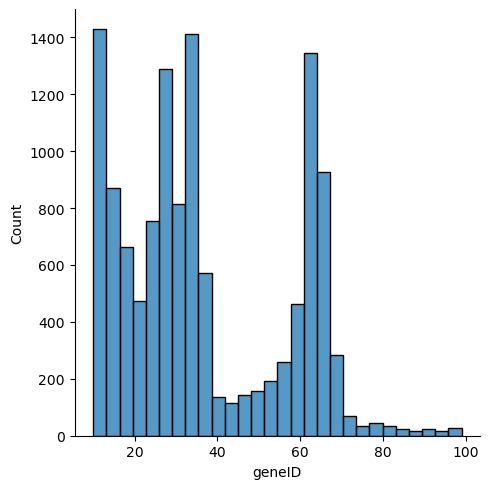

In [8]:
df_filter1 = df_OG_Tritryp_sices[(df_OG_Tritryp_sices['geneID'] > 1) & (df_OG_Tritryp_sices['geneID'] < 100)]


sns.displot(data=df_filter1, 
           x='geneID')


df_filter1.shape

# Amount of uniprot downloaded - available in AFDB

In [11]:
df_uniprot_pLDDT = pd.read_csv('../../report/protein_structure_pLDDT_mean.tsv', sep='\t', header=None, names=['uniprot','pLDDT_mean'])

df_mandatory_uniprot = pd.read_csv('../../../config/mandatory_files/fasta_header_to_uniprot.tsv', sep='\t', header=None, names=['geneID','uniprot'])

In [12]:
df_mandatory_uniprot.uniprot.nunique()

272483

In [13]:
df_uniprot_pLDDT.uniprot.nunique()

272483

# Protein structure inspection 

In [14]:
df_ortho = pd.read_csv('../../report/ortholog_groups_x_sequence_clustering_x_UNIPROT.tsv', sep='\t')

#dataframe with GO annotation informattion
'''df_gene_information = pd.read_csv('../../tmp/GenesByOrthologPattern_Summary.txt',
                                  sep='\t',
                                  low_memory=False)

ortho_g_count = df_gene_information.groupby('Ortholog Group').size().to_frame()'''

"df_gene_information = pd.read_csv('../../tmp/GenesByOrthologPattern_Summary.txt',\n                                  sep='\t',\n                                  low_memory=False)\n\northo_g_count = df_gene_information.groupby('Ortholog Group').size().to_frame()"

In [18]:
print('Cluster totales:', df_ortho.Ortholog_Group.nunique())
print('Cluster totales con estructura:', df_ortho[~df_ortho['pLDDT_mean'].isna()].Ortholog_Group.nunique())
print('Cluster totales sin estructura:', df_ortho[df_ortho['pLDDT_mean'].isna()].Ortholog_Group.nunique())

Cluster totales: 13001
Cluster totales con estructura: 12459
Cluster totales sin estructura: 542


In [16]:
df_ortho

,Ortholog_Group,Gene ID,uniprot,pLDDT_mean
0,DQ04_00151050,LdCL_350035500,A0A504XBM6,99.0
1,Tc_MARK_3549,TcCL_NonESM02890,Q26970,99.0
2,BCY84_05030,LmxM.24.2060,E9AX52,99.0
3,TM35_000012830,TvY486_0302300,Q9GPQ4,99.0
4,LMARLEM2494_330033600,LdCL_110011800,A0A6J8F609,98.0
...,...,...,...,...
12996,LTRL590_160020400,LTRL590_160020400,NaN,NaN
12997,TcCL_NonESM07865,TcCL_NonESM07865,NaN,NaN
12998,LMARLEM2494_230016100,LMARLEM2494_230016100,NaN,NaN
12999,BCY84_03031,BCY84_03031,NaN,NaN


## plotting purpose 

In [16]:
for_ploting = df_ortho[['uniprot', 'pLDDT_mean']]
for_ploting.loc[:,'hue'] = 'selected'

df_uniprot_pLDDT.loc[:,'hue'] = 'total'

for_ploting = pd.concat([for_ploting, df_uniprot_pLDDT])
for_ploting = for_ploting.reset_index(drop=True)

/tmp/ipykernel_3282997/628084746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_ploting.loc[:,'hue'] = 'selected'


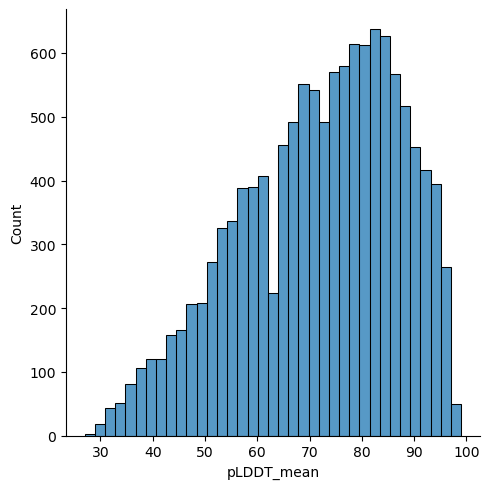

In [17]:
sns.displot(data=df_ortho, x='pLDDT_mean')

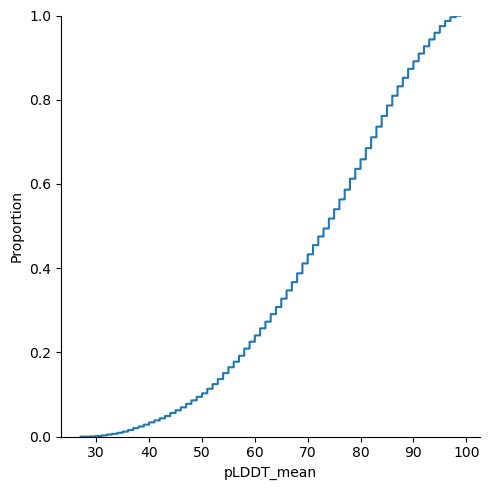

In [18]:
sns.displot(data=df_ortho, x='pLDDT_mean', kind='ecdf')

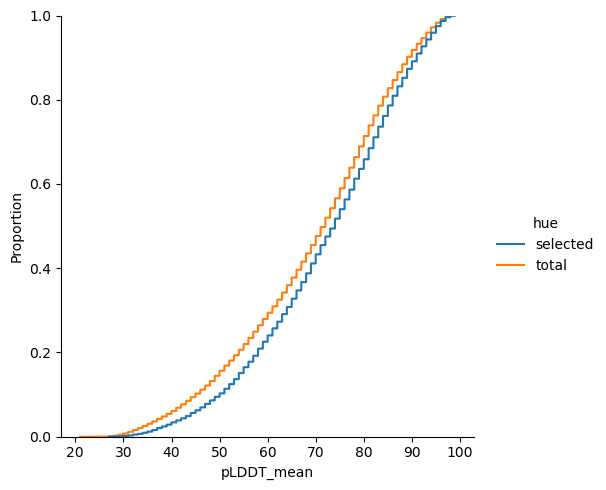

In [19]:
sns.displot(data=for_ploting, x='pLDDT_mean', hue='hue', kind='ecdf')

# Cuantos son completamente hipoteticos? 

In [21]:
df_hypothetical_OG =  pd.read_csv('../../report/Ortholog_Group_Full_of_hypotetical_boolean.tsv', sep='\t')

In [24]:
df_hypothetical_OG.only_hypothetical_OGq.value_counts()

False    10081
True      2920
Name: only_hypothetical_OG, dtype: int64